In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns


ModuleNotFoundError: No module named 'altair'

# ------------------------------ Loading/Exploring Dataset ------------------------------




In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/KyleTy1er/Build-Week-1/master/UFC_Data_Proc.csv')
df.shape

In [ ]:
df_test_stuff = df.copy()

In [5]:
#  I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

import re


r_fighter_cols = [col for col in df_test_stuff.columns if col.startswith("R_")]
b_fighter_cols = [col for col in df_test_stuff.columns if col.startswith("B_")]

other_cols = [col for col in df_test_stuff.columns if col not in r_fighter_cols and col not in b_fighter_cols]

def extractFighters(df_test_stuff, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = df_test_stuff[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = df_test_stuff[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(df_test_stuff, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(df_test_stuff, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,...,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,...,742.60,3.0,Bantamweight,0.0,2.0,4.0,2.0,0.0,0.0,8.0
1,165.10,167.64,Robert Madrigal,Southpaw,125.0,Red,31.0,12.000000,7.714286,9.285714,...,1062.00,2.0,Women's Flyweight,0.0,1.0,2.0,0.0,2.0,0.0,5.0
2,180.34,193.04,Dan Miragliotta,Orthodox,155.0,Red,35.0,13.866667,8.666667,2.866667,...,604.40,2.0,Lightweight,0.0,1.0,3.0,3.0,6.0,1.0,14.0
3,162.56,172.72,Kevin MacDonald,Orthodox,135.0,Blue,29.0,18.250000,10.250000,5.875000,...,690.25,0.0,Bantamweight,0.0,1.0,4.0,1.0,0.0,0.0,6.0
4,187.96,190.50,Dan Miragliotta,Southpaw,264.0,Blue,26.0,7.750000,6.750000,11.000000,...,440.75,0.0,Heavyweight,0.0,0.0,1.0,2.0,0.0,0.0,3.0


In [6]:

for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)
    
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]

In [9]:
fighters_df['fighter']

0

In [40]:
# Making df.columns display all results without truncation

pd.options.display.max_seq_items = None
pd.options.display.max_columns = 999

In [41]:
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l

In [12]:
fighters_df.columns

Index(['Height_cms', 'Reach_cms', 'Referee', 'Stance', 'Weight_lbs', 'age',
       'avg_BODY_att', 'avg_BODY_landed', 'avg_CLINCH_att',
       'avg_CLINCH_landed', 'avg_DISTANCE_att', 'avg_DISTANCE_landed',
       'avg_GROUND_att', 'avg_GROUND_landed', 'avg_HEAD_att',
       'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att', 'avg_LEG_landed',
       'avg_PASS', 'avg_REV', 'avg_SIG_STR_att', 'avg_SIG_STR_landed',
       'avg_SIG_STR_pct', 'avg_SIG_STatt', 'avg_SIG_STlanded', 'avg_SIG_STpct',
       'avg_SUATT', 'avg_SUB_ATT', 'avg_TD_att', 'avg_TD_landed', 'avg_TD_pct',
       'avg_TOTAL_STR_att', 'avg_TOTAL_STR_landed', 'avg_TOTAL_STatt',
       'avg_TOTAL_STlanded', 'avg_opp_BODY_att', 'avg_opp_BODY_landed',
       'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed', 'avg_opp_DISTANCE_att',
       'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att', 'avg_opp_HEAD_landed',
       'avg_opp_KD', 'avg_opp_LEG_att', 'avg_opp_LEG_landed', 'avg_opp_PASS',
 

In [34]:
conor_df = fighters_df[fighters_df['fighter'] == 'Conor McGregor']

In [38]:
conor_df['is_winner'].value_counts()

True     9
False    2
Name: is_winner, dtype: int64

In [ ]:
# Looking at stance counts for colum R_Stance
import altair as alt
import seaborn as sns

Stance = pd.DataFrame(conor_df['Stance'].value_counts())
Stance['Stances'] = Stance.index

alt.Chart(Stance).mark_bar(
    color="#564d8d"
).encode(
    x='Stance',
    y='Stances'
)

In [39]:
fighters_df['is_winner'].value_counts()

False    5227
True     5061
Name: is_winner, dtype: int64

In [23]:
# Looking at stance counts for colum R_Stance
import altair as alt
import seaborn as sns

Stance = pd.DataFrame(fighters_df['Stance'].value_counts())
Stance['Stances'] = Stance.index

alt.Chart(Stance).mark_bar(
    color="#564d8d"
).encode(
    x='Stance',
    y='Stances'
)

alt.Chart(...)

# ------------------------------ Cleaning/Reshaping Data ------------------------------

In [0]:
# Question: Do southpaw fighters have a higher win ratio versus other fighting styles?
# Question: Which fighting styles are most prevalent in the UFC?

In [0]:
# Win ratio of each southpaw fighter

#Creating a function to retrieve all southpaw fighters and assign them a 1 if they win, and a 0 if they lose

def southpaw_red(row):
  if row['R_Stance'] == 'Southpaw' and row['Winner'] == 'Red':
    return 1
  if row['R_Stance'] == 'Southpaw' and row['Winner'] == 'Blue':
    return 0
  else:
      return 'N/A'
      

def southpaw_blue(row):
  if row['B_Stance'] == 'Southpaw' and row['Winner'] == 'Blue':
    return 1
  if row['B_Stance'] == 'Southpaw' and row['Winner'] == 'Red':
    return 0
  else:
    return 'N/A'


In [0]:
# Win ratio of non-southpaw fighters

#Creating a function to retrieve all non-southpaw fighters and assign them a 1 if they win, and a 0 if they lose

def other_fighters_red(row):
  if row['R_Stance'] != 'Southpaw' and row['Winner'] == 'Red':
    return 1
  if row['R_Stance'] != 'Southpaw' and row['Winner'] == 'Blue':
    return 0
  else:
      return 'N/A'
      

def other_fighters_blue(row):
  if row['B_Stance'] != 'Southpaw' and row['Winner'] == 'Blue':
    return 1
  if row['B_Stance'] != 'Southpaw' and row['Winner'] == 'Red':
    return 0
  else:
    return 'N/A'


In [0]:
# Win ratio of orthodox fighters

#Creating a function to retrieve all orthodox fighters and assign them a 1 if they win, and a 0 if they lose

def orthodox_red(row):
  if row['R_Stance'] == 'Orthodox' and row['Winner'] == 'Red':
    return 1
  if row['R_Stance'] == 'Orthodox' and row['Winner'] == 'Blue':
    return 0
  else:
      return 'N/A'
      

def orthodox_blue(row):
  if row['B_Stance'] == 'Orthodox' and row['Winner'] == 'Blue':
    return 1
  if row['B_Stance'] == 'Orthodox' and row['Winner'] == 'Red':
    return 0
  else:
    return 'N/A'

In [0]:
#Creating a win collector function to collect the wins/losses for a ratio calculation

def win_collector(row):
  if row['Win or Loss'] == 1:
    return 1
  if row['Win or Loss'] == 0:
    return 0
  else:
      return np.NaN

In [0]:
#Creating a loss collector function to collect the wins/losses for a ratio calculation

def loss_collector(row):
  if row['Win or Loss'] == 0:
    return 1
  if row['Win or Loss'] == 1:
    return 0
  else:
      return np.NaN

In [0]:
# Taking out just relevant columns for all subsequent graphs

df_subset1 = df[['R_fighter','B_fighter','date','Winner','R_Stance','B_Stance']]
df_subset1.head()

,R_fighter,B_fighter,date,Winner,R_Stance,B_Stance
0,Henry Cejudo,Marlon Moraes,2019-06-08,Red,Orthodox,Orthodox
1,Valentina Shevchenko,Jessica Eye,2019-06-08,Red,Southpaw,Orthodox
2,Tony Ferguson,Donald Cerrone,2019-06-08,Red,Orthodox,Orthodox
3,Jimmie Rivera,Petr Yan,2019-06-08,Blue,Orthodox,Switch
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,Blue,Southpaw,Southpaw


In [0]:
# Taking out just relevant dates for all graphs

df_subset1.set_index('date', inplace=True)
df_subset1 = df_subset1.loc['2019-06-08':'2009-01-01']
df_subset1 = df_subset1.reset_index()


In [0]:
# Renaming columns for stance count concatenation

stanceR = stanceR.rename(columns={"R_Stance": "Stance"}, errors="raise")
stanceB = stanceB.rename(columns={"B_Stance": "Stance"}, errors ="raise")

stanceR = stanceR.rename(columns={"Stance": "Stance Count", "Stance Count": "Stance"}, errors="raise")
stanceB = stanceB.rename(columns={"Stance": "Stance Count", "Stance Count": "Stance"}, errors="raise")

In [0]:
# Most popular stances from B_fighter
stanceB

,Stance Count,Stance
Orthodox,3829,Orthodox
Southpaw,975,Southpaw
Switch,168,Switch
Open Stance,9,Open Stance
Sideways,4,Sideways


In [0]:
# Most popular stances from R_fighter
stanceR

,Stance Count,Stance
Orthodox,3807,Orthodox
Southpaw,1036,Southpaw
Switch,150,Switch
Open Stance,15,Open Stance
Sideways,2,Sideways


In [0]:
# Building a data frame from the stance count numbers for first visualization

All_Stance_Final = pd.DataFrame({'Fight Count': [6050,1637,258,13], 'Stance': ["Orthodox","Southpaw","Switch","Open Stance",]})

All_Stance_Final

,Fight Count,Stance
0,6050,Orthodox
1,1637,Southpaw
2,258,Switch
3,13,Open Stance


In [0]:
## Data Prep for Southpaw Fighters

# Applying the south paw function to the df_subset data to create new columns containing southpaw data

df_subset1['South Paw Red Win'] = df_subset1.apply(southpaw_red, axis=1)
df_subset1['South Paw Blue Win'] = df_subset1.apply(southpaw_blue, axis=1)

#Taking out just southpaw fighters for each corner

df_subsetR = df_subset1[df_subset1['R_Stance'] == 'Southpaw']
df_subsetB = df_subset1[df_subset1['B_Stance'] == 'Southpaw']

# Dropping the blue corner that is not collected in this subset

df_subsetR2 = df_subsetR.drop(['B_fighter', 'Winner', 'B_Stance', 'South Paw Blue Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

df_subsetR3 = df_subsetR2.rename(columns={"R_fighter": "Fighter", "R_Stance": "Stance", "South Paw Red Win": "Win or Loss"}, errors="raise")

# Dropping the red corner that is not collected in this subset

df_subsetB2 = df_subsetB.drop(['R_fighter', 'Winner', 'R_Stance', 'South Paw Red Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

df_subsetB3 = df_subsetB2.rename(columns={"B_fighter": "Fighter", "B_Stance": "Stance", "South Paw Blue Win": "Win or Loss"}, errors="raise")

# Concatenating the columns to include win loss for all southpaw fighters no longer separated by red or blue corner

South_Paw_Final = pd.concat([df_subsetB3, df_subsetR3])

# Replacing 'N/A' columns with np.NaN instead

South_Paw_Final['Win or Loss'] = South_Paw_Final['Win or Loss'].replace({'N/A': np.NaN})

# Making a copy in case something gets messed up...

South_Paw_Final1 = South_Paw_Final

# Creating a year column that groups each specific date into broader category of "Year"

South_Paw_Final1['year'] = South_Paw_Final['date'].apply(lambda x : x.split('-')[0])

# Applying win collector and loss collector functions to the south paw data frame to create new win loss columns

South_Paw_Final1['Win'] = South_Paw_Final1.apply(win_collector, axis=1)
South_Paw_Final1['Loss'] = South_Paw_Final1.apply(loss_collector, axis=1)

# Calculating and creating a ratio column to hold the win loss ratio for Southpaw fighters

South_Paw_Ratio_Df = pd.DataFrame([South_Paw_Final1.groupby('year').sum().Win, 
              South_Paw_Final1.groupby('year').sum().Loss]).fillna(0).T

South_Paw_Ratio_Df['Ratio'] = South_Paw_Ratio_Df['Win']/South_Paw_Ratio_Df['Loss']

South_Paw_Ratio_Df = South_Paw_Ratio_Df.reset_index()

In [0]:
## Data Prep for Non Southpaw Fighters:

# Applying the other fighters function to the df_subset data

df_subset1['Other Red Win'] = df_subset1.apply(other_fighters_red, axis=1)
df_subset1['Other Blue Win'] = df_subset1.apply(other_fighters_blue, axis=1)

#Taking out relevant data

df_other = df_subset1[['R_fighter','B_fighter','date','Winner','R_Stance','B_Stance','Other Red Win', 'Other Blue Win']]

# Taking out non southpaw fighters for each corner

df_other_subsetR = df_other[df_other['R_Stance'] != 'Southpaw']
df_other_subsetB = df_other[df_other['B_Stance'] != 'Southpaw']

# Dropping the blue corner that is not collected in this subset 

df_other_subsetR = df_other_subsetR.drop(['B_fighter', 'Winner', 'B_Stance', 'Other Blue Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

df_other_subsetR = df_other_subsetR.rename(columns={"R_fighter": "Fighter", "R_Stance": "Stance", "Other Red Win": "Win or Loss"}, errors="raise")

# Dropping the red corner that is not collected in this subset 

df_other_subsetB = df_other_subsetB.drop(['R_fighter', 'Winner', 'R_Stance', 'Other Red Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

df_other_subsetB = df_other_subsetB.rename(columns={"B_fighter": "Fighter", "B_Stance": "Stance", "Other Blue Win": "Win or Loss"}, errors="raise")

# Concatenating the columns to include win loss for all other style fighters no longer separated by red or blue corner

Other_Style_Final = pd.concat([df_other_subsetB, df_other_subsetR])

# Replacing 'N/A' columns with np.NaN instead

Other_Style_Final['Win or Loss'] = Other_Style_Final['Win or Loss'].replace({'N/A': np.NaN})

# Creating a copy in case something gets messed up...

Other_Style_Final1 = Other_Style_Final

# Creating a new column that groups each date into a column only including year

Other_Style_Final1['year'] = Other_Style_Final1['date'].apply(lambda x : x.split('-')[0])

# Resetting index to access date value for graphing

Other_Style_Final1 = Other_Style_Final1.reset_index()

# Applyin win collector function to create new columns win and loss for calculating win loss ratio

Other_Style_Final1['Win'] = Other_Style_Final1.apply(win_collector, axis=1)
Other_Style_Final1['Loss']= Other_Style_Final1.apply(loss_collector, axis=1)

# Create a new data frame that contains the Ratio of wins to losses

Other_Style_Ratio_Df = pd.DataFrame([Other_Style_Final1.groupby('year').sum().Win, 
              Other_Style_Final1.groupby('year').sum().Loss]).fillna(0).T

Other_Style_Ratio_Df['Ratio'] = Other_Style_Ratio_Df['Win']/Other_Style_Ratio_Df['Loss']

Other_Style_Ratio_Df = Other_Style_Ratio_Df.reset_index()

In [0]:
## Data Prep for Orthodox Fighters

# Taking out just relevant columns

orthodox_subset1 = df_subset1[['R_fighter','B_fighter','date','Winner','R_Stance','B_Stance']]

# Applying the south paw function to the data

orthodox_subset1['Orthodox Red Win'] = df_subset1.apply(orthodox_red, axis=1)
orthodox_subset1['Orthodox Blue Win'] = df_subset1.apply(orthodox_blue, axis=1)

#Taking out just orthodox fighters for each corner

orthodox_subsetR = orthodox_subset1[orthodox_subset1['R_Stance'] == 'Orthodox']
orthodox_subsetB = orthodox_subset1[orthodox_subset1['B_Stance'] == 'Orthodox']

# Dropping the blue corner that is not collected in this subset

orthodox_subsetR = orthodox_subsetR.drop(['B_fighter', 'Winner', 'B_Stance', 'Orthodox Blue Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

orthodox_subsetR = orthodox_subsetR.rename(columns={"R_fighter": "Fighter", "R_Stance": "Stance", "Orthodox Red Win": "Win or Loss"}, errors="raise")

# Dropping the red corner that is not collected in this subset

orthodox_subsetB = orthodox_subsetB.drop(['R_fighter', 'Winner', 'R_Stance', 'Orthodox Red Win'], axis=1)

# Renaming the columns for the purpose of concatenating the two corners after

orthodox_subsetB = orthodox_subsetB.rename(columns={"B_fighter": "Fighter", "B_Stance": "Stance", "Orthodox Blue Win": "Win or Loss"}, errors="raise")

# Concatenating the columns to include win loss for all southpaw fighters no longer separated by red or blue corner

Orthodox_Final = pd.concat([orthodox_subsetR, orthodox_subsetB])

# Replacing 'N/A' columns with np.NaN instead

Orthodox_Final['Win or Loss'] = Orthodox_Final['Win or Loss'].replace({'N/A': np.NaN})

# Creating a year column that groups each specific date into broader category of "Year"

Orthodox_Final['year'] = Orthodox_Final['date'].apply(lambda x : x.split('-')[0])

# Applying win collector function to Orthodox data 

Orthodox_Final['Win'] = Orthodox_Final.apply(win_collector, axis=1)
Orthodox_Final['Loss'] = Orthodox_Final.apply(loss_collector, axis=1)

# Calculating and creating a ratio data frame to hold the win loss ratio for Orthodox fighters

Orthodox_Ratio_Df = pd.DataFrame([Orthodox_Final.groupby('year').sum().Win, 
              Orthodox_Final.groupby('year').sum().Loss]).fillna(0).T

Orthodox_Ratio_Df['Ratio'] = Orthodox_Ratio_Df['Win']/Orthodox_Ratio_Df['Loss']

Orthodox_Ratio_Df = Orthodox_Ratio_Df.reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# ------------------------------ Data Visualizations ------------------------------

In [0]:
# Creating a visualization to show the most common fighting styles


bars = alt.Chart(All_Stance_Final).mark_bar(size=45).encode(
    
    x='Fight Count',
    y="Stance",
    color = 'Stance',
).properties(
    title='Total Fights by Stance 2009 to 2019'
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='Fight Count'
)

(bars + text).properties(height=400, width=500)
7958

7958

In [0]:
# Creating a visualization to show the most common fighting styles, this time exerimenting with the legend of altair

chart = alt.Chart(All_Stance_Final).mark_bar(size=45).encode(
    x='Fight Count',
    y='Stance',
    color='Stance'
    ).properties(
    title='Total Fights by Stance'
)
    


text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='Fight Count'
)
(chart + text).properties(height=550, width=650)

chart.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-right'

).properties(
  width=550,
  height=450
)
# )



alt.Chart(...)

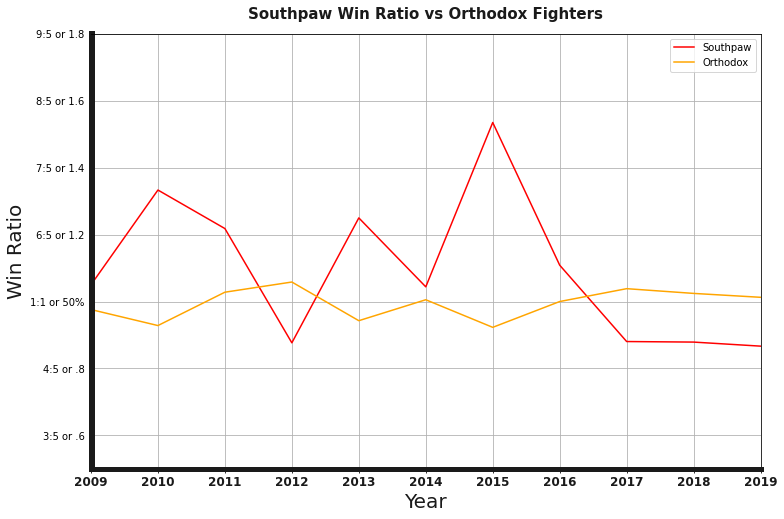

In [0]:
# Creating a visualization to show win ratio of southpaw fighters compared to orthodox fighters

# Setting the figure axes
fig, ax = plt.subplots(figsize=(12,8))


# Setting the title
ax.set_title("Southpaw Win Ratio vs Orthodox Fighters",
          fontsize=15,
          fontweight='bold',
          pad=15,
          ha='center',
          color='.1')

plt.plot(South_Paw_Ratio_Df['Ratio'], color='red')
plt.plot(Orthodox_Ratio_Df['Ratio'], color='orange')

# Creating the X and Y labels

plt.xlabel('Year', fontsize=20, color='.1')
plt.ylabel('Win Ratio', fontsize=20, color='.1')

# Creating the Legend

plt.legend(labels=['Southpaw','Orthodox'],loc="upper right")

plt.grid(axis= 'both')

# Y Tick settings

y_ticks_list = [.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8]
y_ticks_labels = ['3:5 or .6', '4:5 or .8', '1:1 or 50%', '6:5 or 1.2', '7:5 or 1.4', '8:5 or 1.6', '9:5 or 1.8']

plt.yticks(y_ticks_list,
           y_ticks_labels, 
           fontsize=21)


# X Tick settings

x_ticks_list = range(0,11)
x_ticks_labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.xticks(x_ticks_list,
           x_ticks_labels,   
           rotation='horizontal',
           fontsize=12,
           fontweight='bold',
           color='.1')


# Spine settings

ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('.1')
ax.spines['left'].set_linewidth('6')
ax.spines['left'].set_position(('axes', .0009))
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_color('.1')
ax.spines['bottom'].set_linewidth('5')

plt.xlim(0,10)
plt.ylim(.5,1.8)
plt.show()


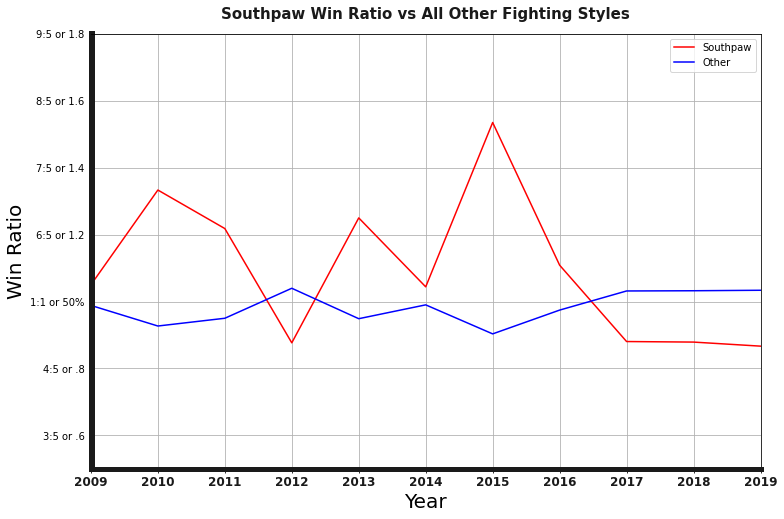

In [0]:
# Plotting the win/loss ratio of southpaw fighters against all other fighters


# Setting the figure and axes

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title("Southpaw Win Ratio vs All Other Fighting Styles",
          fontsize=15,
          fontweight='bold',
          pad=15,
          ha='center',
          color='.1')

plt.plot(South_Paw_Ratio_Df['Ratio'], color='red')
plt.plot(Other_Style_Ratio_Df['Ratio'], color='blue')


# Creating the X and Y labels

plt.xlabel('Year', fontsize=20)
plt.ylabel('Win Ratio', fontsize=20)

# Creating the Legend

plt.legend(labels=['Southpaw','Other'],loc="upper right")

# Setting a grid

plt.grid(axis= 'both')

# Y Tick settings

y_ticks_list = [.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8]
y_ticks_labels = ['3:5 or .6', '4:5 or .8', '1:1 or 50%', '6:5 or 1.2', '7:5 or 1.4', '8:5 or 1.6', '9:5 or 1.8']


plt.yticks(y_ticks_list,
           y_ticks_labels,   
           rotation='horizontal',
           fontsize=23,
           fontweight='bold',
           color='.1')

# X Tick settings

x_ticks_list = range(0,11)
x_ticks_labels = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.xticks(x_ticks_list,
           x_ticks_labels,   
           rotation='horizontal',
           fontsize=12,
           fontweight='bold',
           color='.1')


# Spine settings

ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('.1')
ax.spines['left'].set_linewidth('6')
ax.spines['left'].set_position(('axes', .001))
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_color('.1')
ax.spines['bottom'].set_linewidth('5')

# Setting X and Y Limits

plt.xlim(0,10)
plt.ylim(.5,1.8)
plt.show()
